In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names
# THESE ARE THE NAMES OF CIFAR

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

In [7]:
cls_train

array([6, 9, 9, ..., 9, 1, 1])

In [8]:
images_test.shape

(10000, 32, 32, 3)

In [9]:
# BY LOOKING INTO THIS WE CAN SEE WE HAVE AROUND 50000 TRAIN IMAGES AND 10000 TEST IMAGES

In [10]:
# LET US RESHAPE BOTH THE TRAINING AND TESTING DATA
x_images_training=images_train[:, :, :, 0]
train=x_images_training.reshape((50000,32*32))

In [11]:
train.shape

(50000, 1024)

In [12]:
# LET US RESHAPE THE TESTING DATA
x_images_testing=images_test[:, :, :, 0]
test=x_images_testing.reshape((10000,32*32))

In [13]:
print(train.shape)
print(test.shape)

(50000, 1024)
(10000, 1024)


In [14]:
cls_train

array([6, 9, 9, ..., 9, 1, 1])

In [15]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

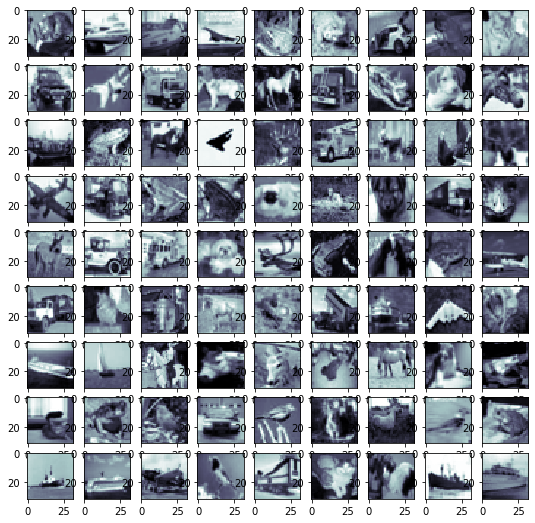

In [16]:
# LET US PLOT THE IMAGES AND SEE HOW IT LOOKS

fig=plt.figure(figsize=(9,9))
for i in range(81):
    ax=fig.add_subplot(9,9,i+1)
    ax.imshow(x_images_testing[i],cmap=plt.cm.bone)
plt.show()


In [17]:
# LET US APPLY PCA....PCA IS USED FOR DIMENSIONALITY REDUCTION IT IS A METHOD OF FEATURE EXTRACTION

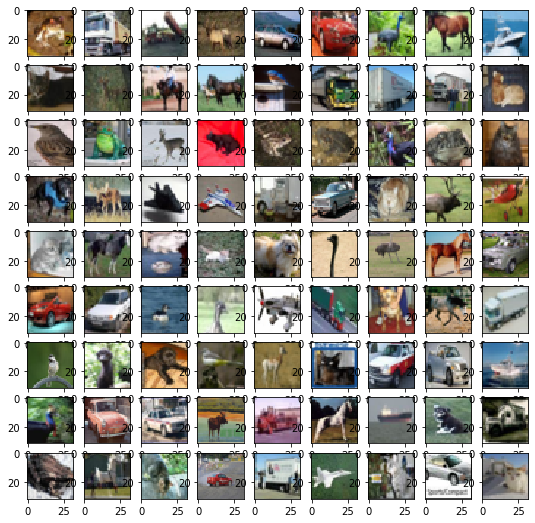

In [18]:
fig=plt.figure(figsize=(9,9))
for i in range(81):
    ax=fig.add_subplot(9,9,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

In [19]:
# LET US IMPORT ALL THE MODELS
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#BEFORE APPLYING PCA DO FEATURE SCALING TO ALL THE FEATURES
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train)

In [21]:
test_scaled=scaler.fit_transform(test)

In [22]:
# BECAUSE WE DONT KNOW WHETHER SCALED DATA or NORMAL DATA WILL GIVE YOU THE RIGHT CLASSIFICATION

In [23]:
# NOW YOU APPLY PCA TO IT

In [24]:
pc=PCA(whiten=True)
train_scaled_pca=pc.fit(train_scaled)

# IT CANNOT CREATE IMAGES OF THAT KIND WHAT WE DO IS WE WILL REDUCE 5000

In [25]:
train_scaled_pca.components_.shape

(1024, 1024)

In [26]:
# YOU HAVE 1024 COMPONENTS SO EACH COMPONENT WILL HAVE THE LENGHT OF THE FEATURES

In [27]:
# NOW WE HAVE TO CALCUALTE HOW MANY PRINCIPAL COMPONENTS WE MUST HAVE

In [28]:
pc.explained_variance_

array([1.87012333e+01, 7.85508012e+00, 4.62051268e+00, ...,
       4.25066971e-05, 3.89955798e-05, 3.80660835e-05])

In [29]:
k=0
total=sum(pc.explained_variance_)
current_sum=0
while current_sum/total<0.99:
    current_sum+=pc.explained_variance_[k]
    k=k+1
print(k)

429


In [30]:
# OH MY GOD FROM 1029 WE CAN HAVE ONLY 429 COMPONENTS TO TRAIN THE FEATURES..IT IS PREETY GOOD

In [31]:
# NOW WE WILL GET THE DATA OF THAT WIHT USING ONLY k COMPONENTS...IT IS PRETTY SIMPLE

In [32]:
pc1=PCA(n_components=429,whiten=True)

In [33]:
train_scaled_pca_k=pc1.fit_transform(train_scaled)

In [34]:
test_scaled_pca_k=pc1.transform(test_scaled)

In [35]:
train_scaled_pca_k

array([[ 0.15517176,  1.00614416, -0.93850902, ..., -0.86229613,
         0.53446974, -0.05650954],
       [-0.02332017, -0.17425114, -1.50492043, ..., -0.56479168,
         0.36354841, -1.45628947],
       [ 0.82900004, -2.81914155,  0.42007413, ...,  0.22654775,
         0.03180122, -1.54963019],
       ...,
       [-0.8686158 , -2.18930131,  0.28092855, ..., -0.4117893 ,
         0.52083886,  0.17956663],
       [ 1.14996122, -0.72962773, -1.1286628 , ...,  0.40171076,
        -0.43015456, -2.36428137],
       [ 0.65735174, -0.57152408,  1.03020453, ..., -0.0277034 ,
        -1.32353658, -0.46549312]])

In [36]:
train_scaled_pca_k.shape

(50000, 429)

In [37]:
# NOW WHAT WE DO IS WE WILL TRY TO GET BACK THE FEATURES HOW IT HAS BEEN DONE

In [38]:
x_tranformed=pc1.inverse_transform(train_scaled_pca_k)

In [39]:
# WE WILL CHECK WHETHER THE PRINCIPAL COMPOENTS WHICH IS CREATED IS GOOD OR NOT

In [40]:
x_tranformed.shape

(50000, 1024)

In [41]:
# NOW WE WILL RESIZE THE IMAGES

In [42]:
x_transformed_reshape=x_tranformed.reshape(50000,32,32)

In [43]:
# NOW LET US DRAW OR PLOT THE IMAGES

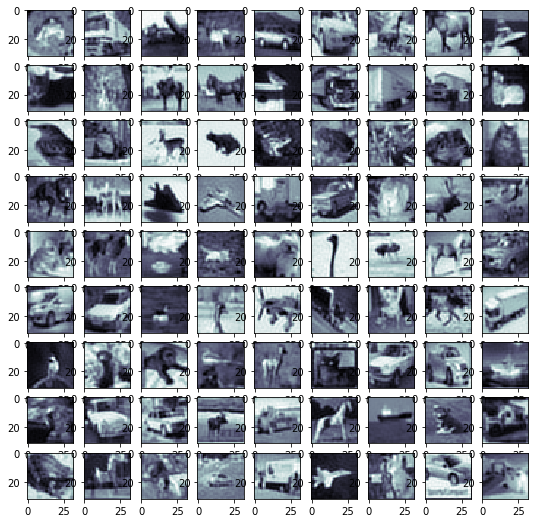

In [44]:
fig2=plt.figure(figsize=(9,9))

for i in range(81):
    ax2=fig2.add_subplot(9,9,i+1)
    ax2.imshow(x_transformed_reshape[i],cmap=plt.cm.bone)
plt.show()

In [45]:
# THE ABOVE PLOT IS PRETTY GOOD

In [46]:
test_scaled_pca_k.shape

(10000, 429)

In [47]:
#NOW LET US IMPORT ALL THE MODULES

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import GridSearchCV

In [51]:
y_train=cls_train

In [52]:

clf1 = RandomForestClassifier()
grid_RF ={
    'n_estimators':[5,10,20,30],
    'max_depth':[10,20,30,35]
}
grid_search_RF = GridSearchCV(clf1, grid_RF)
grid_search_RF.fit(train_scaled_pca_k,y_train)
grid_search_RF.best_estimator_
grid_search_RF.best_score_


KeyboardInterrupt: 

In [ ]:

clf2= SVC()
grid_SVC = {'C' : [1e2, 1e3, 5e3, 1e4],
       'gamma' : [1e-3, 5e-4, 1e-4]}
grid_search_SVC = GridSearchCV(clf2, grid_SVC,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))
grid_search_SVC.fit(train_scaled_pca_k,y_train)
grid_search_SVC.best_score_

In [ ]:

clf3 = DecisionTreeClassifier(criterion="entropy",splitter="best")
grid_DT = {'min_samples_split':[2,5,10,15,20,25,30],'max_depth':[10,15,20,25,30,35],
           'min_impurity_decrease':[10**-i for i in range(2, 5)]}
grid_search_DT = GridSearchCV(clf3, grid_DT,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))
grid_search_DT.fit(train_scaled_pca_k,y_train)
grid_search_DT.best_score_


In [52]:
# RUN TILL ABOVE

In [53]:
y_test_predicted1=clf1.predict(test_scaled_pca_k)
y_test_predicted2=clf2.predict(test_scaled_pca_k)
y_test_predicted3=clf3.predict(test_scaled_pca_k)
#y_test_predicted4=clf4.predict(x_test_transformed)

In [54]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in range(len(y_test_predicted1)):
    arr=np.array([y_test_predicted1[i], y_test_predicted2[i], y_test_predicted3[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

In [55]:
np.savetxt(fname="answers.csv", X=ans, delimiter=',', fmt="%s")